$1.$  Realice un notebook en el se programen y expliquen los siguientes algoritmos de integracion de ecuaciones diferenciales:

Verifique el funcionamiento de sus integradores encontrando la solucion de la siguiente ecuacion diferencial para
$y(t):$

$$\ddot{x} + 0.5 \dot{x} + sin(x) = e^{-t} sin(3t)$$

Con condiciones iniciales $\dot{x}(0)=1$ y $x(0)=0$

### $a)$  Integracion con metodo de Euler

Se utiliza una expansión en series de Taylor para calcular una aproximación $y_{k+1}$:

$$y_{k+1}=y_k + hf(y_k,t_k)$$

Dicho metodo se puede considerar como el mas sencillo para resolver ecuaciones diferenciales de manera numerica.

In [199]:
from pylab import *
%matplotlib inline
import random 

In [210]:
def euler(ec,y_i,t,h=0.01):
    tiempo = arange(t[0],t[1]+h,h)
    y = zeros((len(tiempo),len(y_i)))
    y[0,:] = y_i
    for i in xrange(len(y)-1):
        y[i+1] = y[i] + h*ec(y[i],tiempo[i])
    return tiempo,y

### $b)$  Integracion sobre serie de Taylor a $2^o$ orden

In [211]:
def segundo_orden(ec_diff,d_ec_diff,y_i,t,h=0.1): 
    tiempo=arange(t[0],t[1]+h,h)
    y = zeros((len(tiempo),len(y_i)))
    y[0,:] = y_i
    for i in xrange(len(tiempo)-1):
        ec=ec_diff(y[i,:],tiempo[i])
        d_ec,jac=d_ec_diff(y[i,:],tiempo[i])
        y[i+1,:] = y[i,:] + h*ec+(0.5*h*h*(d_ec+dot(jac,ec)))
    return tiempo,y

### $c)$  Integracion con metodo de Runge-Kutta de $2^o$ orden

In [212]:
def rk2(ec,y_i,t,h=0.1):
    tiempo = arange(t[0],t[1]+h,h)
    y = zeros((len(tiempo),len(y_i)))
    y[0,:] = y_i
    for i in xrange (len(tiempo)-1):
        k = h*ec(y[i,:],tiempo[i])
        f = ec(y[i,:]+0.5*k,tiempo[i]+0.5*h)
        y[i+1,:]=y[i,:]+h*f
    return tiempo,y

### $d)$  Integracion con metodo de Runge-Kutta de $4^o$ orden


In [213]:
def rk4(ec,y_i,t,h=0.1):
    tiempo = arange(t[0],t[1]+h,h)
    y = zeros((len(tiempo),len(y_i)))
    y[0,:] = y_i
    for i in xrange (len(tiempo)-1):
        k1 = ec(y[i,:],tiempo[i])
        k2 = ec(y[i,:]+0.5*h*k1,tiempo[i]+0.5*h)
        k3 = ec(y[i,:]+0.5*h*k2,tiempo[i]+0.5*h)
        k4 = ec(y[i,:]+h*k3,tiempo[i]+h)
        y[i+1,:]=y[i,:]+(h/6.)*(k1+2*k2+2*k3+k4)
    return tiempo,y

Redefiniendo a $\dot{x}=y $, $\ddot{x}=\dot{y}= e^{-t} sin(3t)-sin x - 0.5 y$ , y $y[1]=y, y[0]=x$

In [214]:
def edo(y,t): 
    return array([y[1],exp(-t)*sin(3*t)-0.5*y[1]-sin(y[0])])

def d_edo(y,t):
    return array ([0,(3*cos(3*t)-sin(3*t))*exp(-t)]), array([[0,1],[-cos(y[0]),-0.5]])

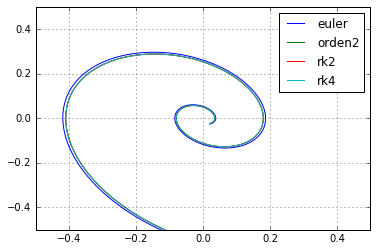

In [231]:
t,y=euler(edo,[0.,1.],[0.,5*pi],0.01)
plot(y[:,0],y[:,1],label='euler')
t,y1=segundo_orden(edo,d_edo,[0.,1.],[0.,5*pi],0.01)
plot(y1[:,0],y1[:,1],label='orden2')
t,y2=rk2(edo,[0.,1.],[0.,5*pi],0.01)
plot(y2[:,0],y2[:,1],label='rk2')
t,y4=rk4(edo,[0.,1.],[0.,5*pi],0.01)
plot(y4[:,0],y4[:,1],label='rk4')
xlim([-zoom,zoom]),ylim([-zoom,zoom])
zoom=0.09
grid(True)
legend()
show()

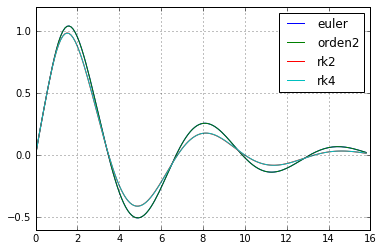

In [216]:
t,y=euler(edo,[0.,1.],[0.,5*pi],0.1)
plot(t,y[:,0],label='euler')
t,y1=segundo_orden(edo,d_edo,[0.,1.],[0.,5*pi],0.1)
plot(t,y[:,0],label='orden2')
t,y2=rk2(edo,[0.,1.],[0.,5*pi],0.1)
plot(t,y2[:,0],label='rk2')
t,y4=rk4(edo,[0.,1.],[0.,5*pi],0.1)
plot(t,y4[:,0],label='rk4')
grid(True)
legend()
show()



### $2.−$ Utilizando los integradores anteriores encuentre el mejor paso de integración para la siguiente ecuación:
$$y⃛ +ÿ^2−3y^3+cos2(y)=e^{−t}sin(3t)$$

Con condiciones iniciales $ÿ(1)=1, y(1)=2, y(1)=1 $. En particular que sucede en el intervalo $t∈[1,2]$ y $t∈[1,2.1]$.

In [165]:
def f(y,t):
    return array([y[1],y[2],exp(-t)*sin(3*t)-y[2]**2+3*y[1]**3-cos(y[0])**2])
def df(y, t):
    return array([0,0,(3*cos(3*t)-sin(3*t))*exp(-t)]), array([[0,1,0], [0,0,1], [sin(2*y[0]),9*y[1]*y[1],-2*y[2]]])

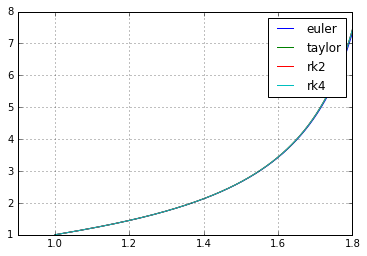

In [166]:
t,y=euler(f,[1.,2.,1.],[1.,1.8],1e-3)
plot(t,y[:,0],label='euler')
t,y1=segundo_orden(f,df,[1.,2.,1.],[1.,1.8],1e-3)
plot(t,y1[:,0],label='taylor')
t,y2=rk2(f,[1.,2.,1.],[1.,1.8],1e-3)
plot(t,y2[:,0],label='rk2')
t,y4=rk4(f,[1.,2.,1.],[1.,1.8],1e-3)
plot(t,y4[:,0],label='rk4')
grid(True)
legend()
show()

### $3.−$ Modifique las funciones integradoras en el problema 1 de tal manera que se puedan pasar argumentos opcionales al sistema de ecuaciones diferenciales de tal manera que se puedan modificar parámetros al momento de hacer la integración. Una vez hecho esto, obtenga la solución de la siguiente ecuación diferencial:
$$\ddot{x}+110 \dot{x}+4sin(x)=12sin(ωt)$$

Con condiciones iniciales $\dot{x}(0)=1$ y $x(0)=0$ y para $ω=\{1,1.1,1.2,1.3,...,2.9,3\}$. Realice la gráfica de algunas soluciones que representen el comportamiento de la solución en función de ω y explique su resultado.

In [167]:
def euler_mod(ec,y_i,t,h=0.01,omega=0):
    tiempo = arange(t[0],t[1]+h,h)
    y = zeros((len(tiempo),len(y_i)))
    y[0,:] = y_i
    if omega==0:
        for i in xrange(len(y)-1):
            y[i+1] = y[i] + h*ec(y[i],tiempo[i])
    else:
        for i in xrange(len(y)-1):
            y[i+1] = y[i] + h*ec(y[i],tiempo[i],omega)
    return tiempo,y

In [168]:
def segundo_orden_mod(edo,d_edo,y_i,t,h=0.1,omega=0): 
    tiempo=arange(t[0],t[1]+h,h) 
    y=zeros((len(tiempo),len(y_i)))
    y[0,:] = y_i 
    if omega==0:
        for i in xrange(len(tiempo)-1):
            ec = edo(y[i,:], tiempo[i])
            d_ec, jac = d_edo(y[i,:], tiempo[i])
            y[i+1,:]=y[i,:]+h*ec+(0.5*h*h*(d_ec+dot(jac, ec)))
    else:
        for i in xrange(len(tiempo)-1):
            ec = edo(y[i,:], tiempo[i],omega)
            d_ec, jac = d_edo(y[i,:], tiempo[i])
            y[i+1,:]=y[i,:]+h*ec+(0.5*h*h*(d_ec+dot(jac, ec)))
    return tiempo, y

In [189]:
def rk2_mod(ec_diff,y_i,t,h=0.1,omega=0):
    tiempo=arange(t[0],t[1]+h, h)
    y=zeros((len(tiempo),len(y_i)))
    y[0,:]=y_i
    if omega==0:
        for i in xrange(len(tiempo)-1):
            k=h*ec_diff(y[i,:], tiempo[i])
            ec=ec_diff(y[i,:]+0.5*k,tiempo[i]+0.5*h)
            y[i+1,:]=y[i,:]+h*ec
    else:
        for i in xrange(len(tiempo)-1):
            k=h*ec_diff(y[i,:], tiempo[i],omega)
            ec=ec_diff(y[i,:]+0.5*k,tiempo[i]+0.5*h,omega)
            y[i+1,:]=y[i,:]+h*ec
    return tiempo,y

In [187]:
def rk4_mod(ec,y_i,t,h=0.1,omega=0):
    tiempo=arange(t[0],t[1]+h, h)
    y=zeros((len(tiempo),len(y_i)))
    y[0,:]=y_i
    if omega==0:
        for i in xrange(len(tiempo)-1):
            k1=ec(y[i,:],tiempo[i])
            k2=ec(y[i,:]+0.5*h*k1,tiempo[i]+0.5*h)
            k3=ec(y[i,:]+0.5*h*k2,tiempo[i]+0.5*h)
            k4=ec(y[i,:]+h*k3,tiempo[i]+h)
            y[i+1,:]=y[i,:]+(h/6.)*(k1+2*k2+2*k3+k4) 
    else:
         for i in xrange(len(tiempo)-1):
            k1=ec(y[i,:],tiempo[i],omega)
            k2=ec(y[i,:]+0.5*h*k1,tiempo[i]+0.5*h,omega)
            k3=ec(y[i,:]+0.5*h*k2,tiempo[i]+0.5*h,omega)
            k4=ec(y[i,:]+h*k3,tiempo[i]+h,omega)
            y[i+1,:]=y[i,:]+(h/6.)*(k1+2*k2+2*k3+k4)
    return tiempo,y


In [171]:
def ec_diff(y,t,omega=1): 
    return array([y[1],0.5*sin(omega*t)-0.1*y[1]-4*sin(y[0])])

def d_ec_diff(y,t,omega=1): 
    return array([0,omega*cos(omega*t)]),array([[0,1],[-4*cos(y[0]),-0.1]])

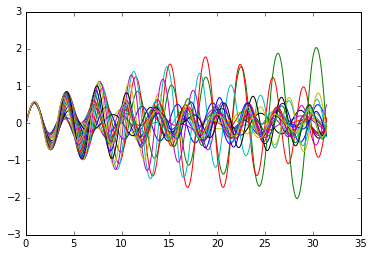

In [172]:
n=1
while n<=3:
    t,sol = euler_mod(ec_diff,[0.0, 1.0],[0, 10*pi],0.01,n)
    plot(t,sol[:,0])
    n=n+0.1

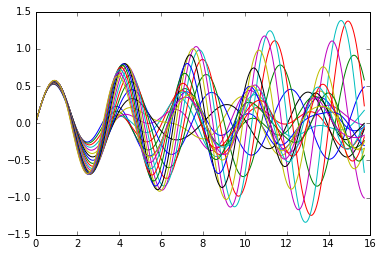

In [173]:
n=1
while n<=3:
    t,sol = segundo_orden_mod(ec_diff,d_ec_diff,[0.0, 1.0],[0, 5*pi],0.01,n)
    plot(t,sol[:,0])
    n=n+0.1

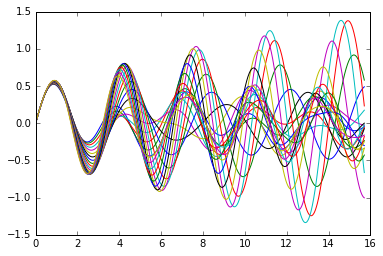

In [190]:
n=1
while n<=3:
    t,sol = rk2_mod(ec_diff,[0.0, 1.0],[0, 5*pi],0.01,n)
    plot(t,sol[:,0])
    n=n+0.1

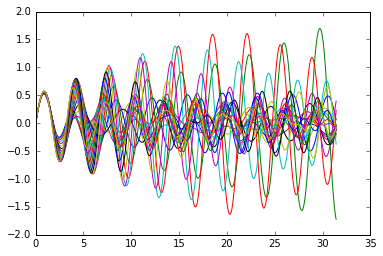

In [188]:
n=1
while n<=3:
    t,sol = rk4_mod(ec_diff,[0.0, 1.0],[0, 10*pi],0.01,n)
    plot(t,sol[:,0])
    n=n+0.1

Tal que para cada ecuacion $\dot{x}=y, \ddot{x}=\dot{y}=sin(ω t)-4sinx-0.1y$, donde $y[1]=y$ y $y[0]=x$.
Y entonces se tendria la gráfica de las soluciones que representan el comportamiento de la solución en función de ω, para $ω=[1,3]$

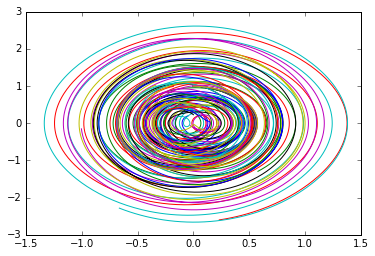

In [236]:
n=1
while n<=3:
    t,sol = rk2_mod(ec_diff,[0.0, 1.0],[0, 5*pi],0.01,n)
    plot(sol[:,0],sol[:,1])
    n=n+0.1

### $4.−$ Considere el siguiente sistema de ecuaciones diferenciales:
$$dx/dt=10(y−x)$$
$$dy/dt=x(28−z)−y$$
$$dz/dt=xy−83z$$
Realice una integración numérica del sistema de ecuaciones con alguno de los integradores del problema y realice los siguientes ejercicios: 

### $a)$ Elija una condición inicial aleatoria en el intervalo $x,y,z∈[−5,5]$ y realice la gráfica de la solución en el plano $xy$, $xz$ y $yz$ y comente sus observaciones.

In [192]:
def lorenz(y,t):
    return array([10*(y[1]-y[0]),y[0]*(28-y[2])-y[1],y[0]*y[1]-(8/3)*y[2]])


In [201]:
x0=random.uniform(-5,5)
y0=random.uniform(-5,5)
z0=random.uniform(-5,5)
print 'x0=',x0
print 'y0=',y0
print 'z0=',z0

x0= 3.89254878063
y0= -3.74708535572
z0= 0.236356565341


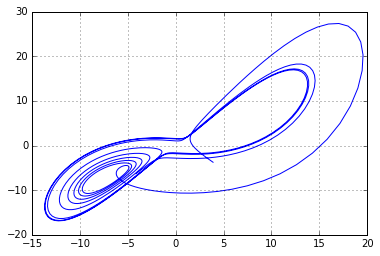

In [202]:
t,l=rk2(lorenz,[x0,y0,z0],[0,10.],0.01)
plot(l[:,0],l[:,1])
grid(True)
show()

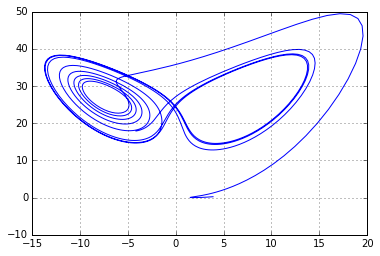

In [203]:
t,l=rk2(lorenz,[x0,y0,z0],[0.,10.],0.01)
plot(l[:,0],l[:,2])
grid(True)
show()


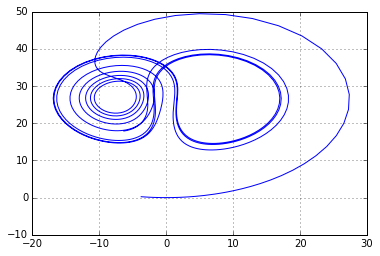

In [204]:
t,l=rk2(lorenz,[x0,y0,z0],[0.,10.],0.01)
plot(l[:,1],l[:,2])
grid(True)
show()

### $(b)$ Ahora tome 3 soluciones precidas. Para ello proponga 3 condiciones iniciales tales que en la coordenada en y las condiciones iniciales difieran entre si en $10^{−2}$. Explique lo que observa.

Tomando las condiciones iniciales:
$$x(0)=2.49$$ $$y(0)=2.50$$ $$z(0)=2.51$$

In [205]:
x1=2.49
y1=2.50
z1=2.51
def lorenz1(y,t):
    return array([10*(y[1]-y[0]),y[0]*(28-y[2])-y[1],y[0]*y[1]-(8/3)*y[2]])

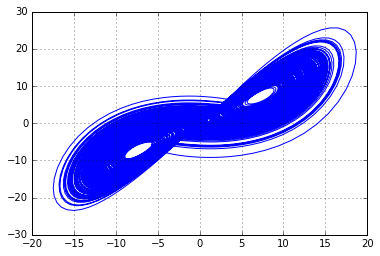

In [206]:
t,l1=rk2(lorenz1,[x1,y1,z1],[0.,250.],0.01)
plot(l1[:,0],l1[:,1])
grid(True)
show()

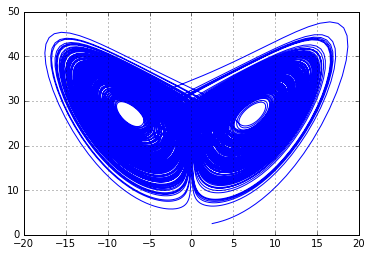

In [207]:
t,l1=rk2(lorenz1,[x1,y1,z1],[0.,250.],0.01)
plot(l1[:,0],l1[:,2])
grid(True)
show()



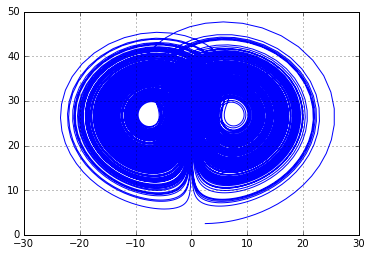

In [208]:
t,l1=rk2(lorenz1,[x1,y1,z1],[0.,250.],0.01)
plot(l1[:,1],l1[:,2])
grid(True)
show()

Podemos observar que aunque las condiciones iniciales difieran unicamente por $10^{−2}$, se tiene que los resultados varian en gran medida.